## Visualization in Python

### Visualization using matplotlib

Matplotlib was originally written as a Python alternative for MATLAB users, and much of its syntax reflects that fact. The MATLAB-style tools are contained in the pyplot (plt) interface.

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter('ignore')

# Graphics in retina format are more sharp and legible
%config InlineBackend.figure_format = 'retina'

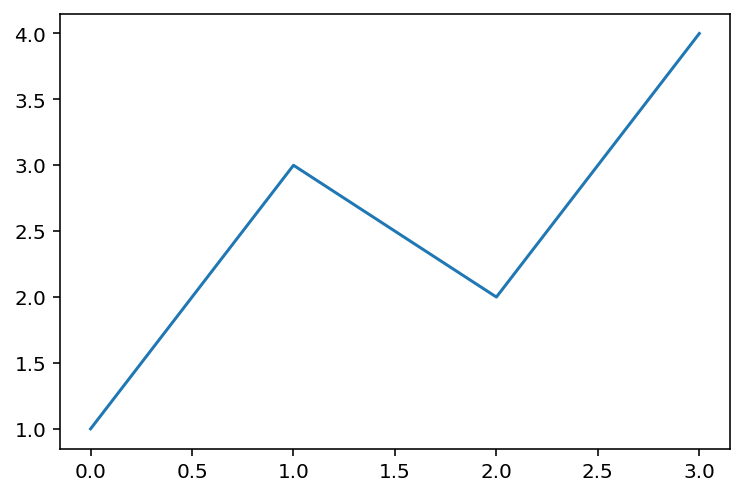

In [2]:
plt.plot([1,3,2,4])
plt.show() # To display the plot after layering multiple elements to the plot

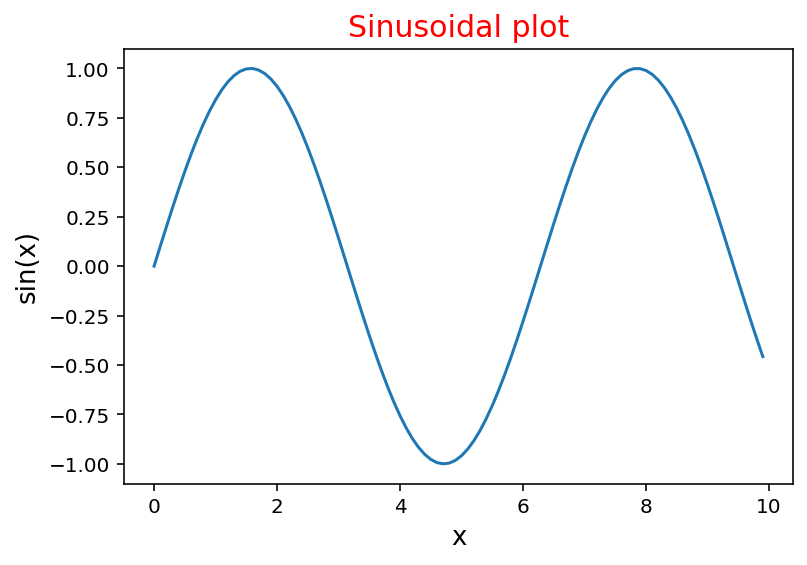

In [3]:
x = np.arange(0, 10, 0.1)
y = np.sin(x)
plt.plot(x, y)
plt.title('Sinusoidal plot', fontsize = 15, color = 'r')
plt.xlabel('x', fontsize = 13)
plt.ylabel('sin(x)', fontsize = 13)
plt.show()

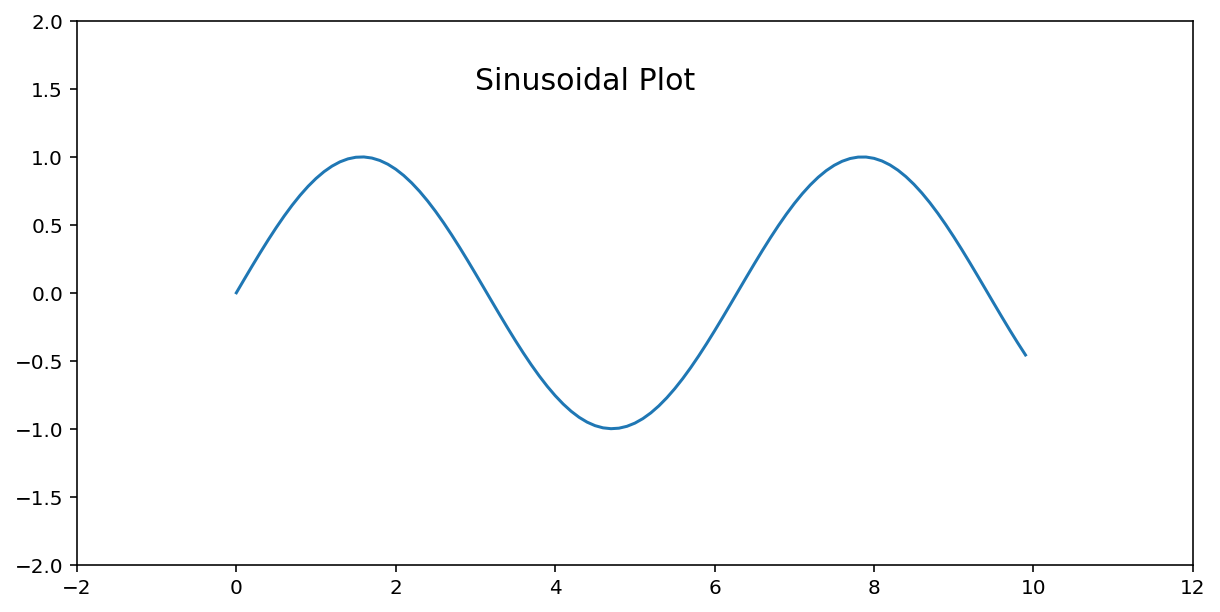

In [4]:
plt.figure(figsize = (10,5)) # 10 inches wide X 5 inches tall
plt.plot(x,y)
plt.axis([-2,12,-2,2])  # [xmin, xmax, ymin, ymax]
plt.annotate('Sinusoidal Plot', (3,1.5), fontsize = 15)
plt.show()

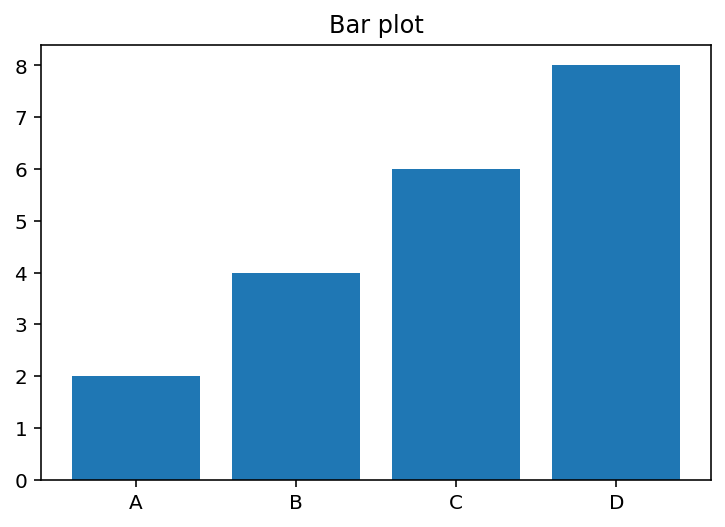

In [5]:
x = [1,2,3,4]
y = [2,4,6,8]
plt.bar(x,y)
plt.xticks(x, ['A','B','C','D'])
plt.title("Bar plot")
plt.show()

#### Dataset

In [27]:
# Loading dataset
df = pd.read_csv('titanic.csv', sep = '|')
df.shape

(891, 12)

In [22]:
df.head(3)

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S

### Data Exploration using Visualization

#### Univariate analysis
* Numerical - Histogram plot, Box plot, Line plot (for time series)
* Categorical - Bar plot, pie chart

#### Bi-variate analysis
* Numerical & Numerical - Scatter plot, Line plot (for time series)
* Categorical & Categorical - Stacked bar plot
* Numerical & Categorical - Box plot

In [29]:
# Filling missing values for age otherwise some plots won't work

df['Age'] = df['Age'].fillna(df['Age'].mean())

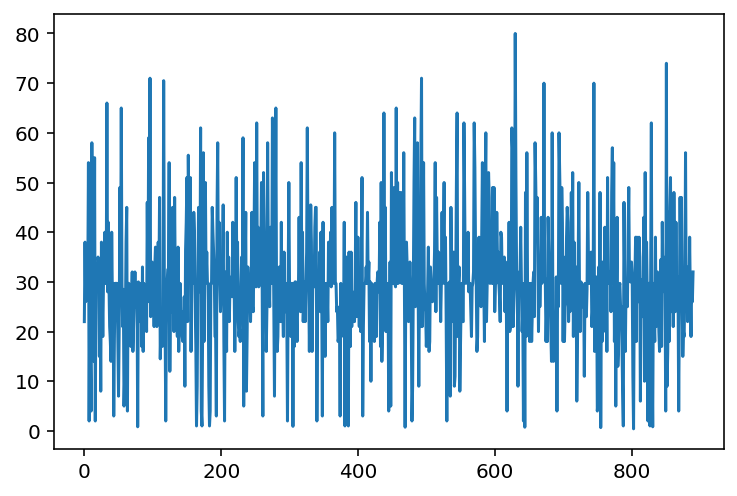

In [30]:
plt.plot(df['Age'])
plt.show()

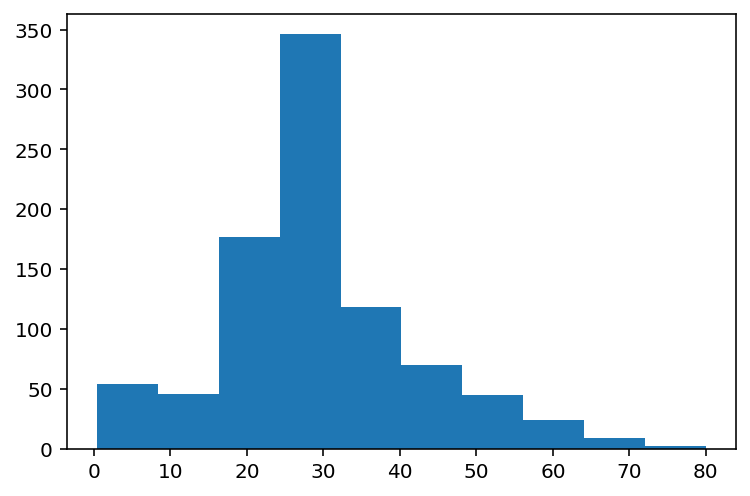

In [31]:
plt.hist(df['Age'] )#bins = [10,20,30,40,50,60]
plt.show()

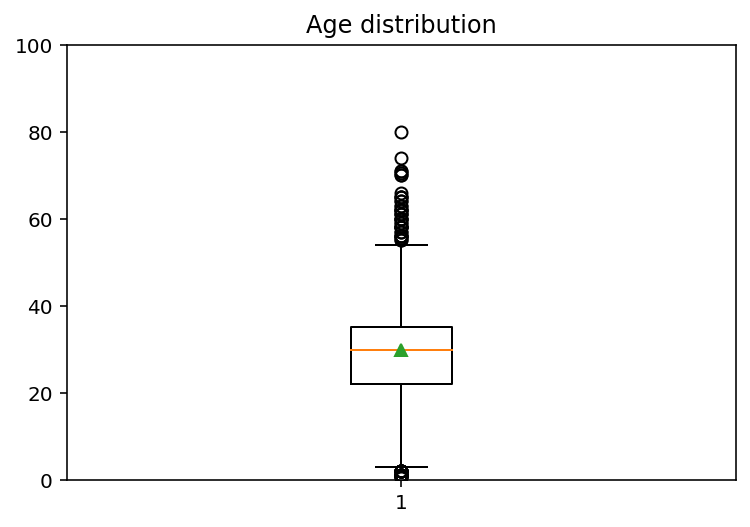

In [32]:
plt.boxplot(df['Age'],showmeans = True)
plt.ylim([0,100])
plt.title("Age distribution")
plt.show()

In [40]:
# Changing the labels to Yes and No for representation puposes on Chart

df['Survived'] = df['Survived'].map({0:'No',1:'Yes'})

In [41]:
df.groupby('Survived').size()

Survived
No     549
Yes    342
dtype: int64

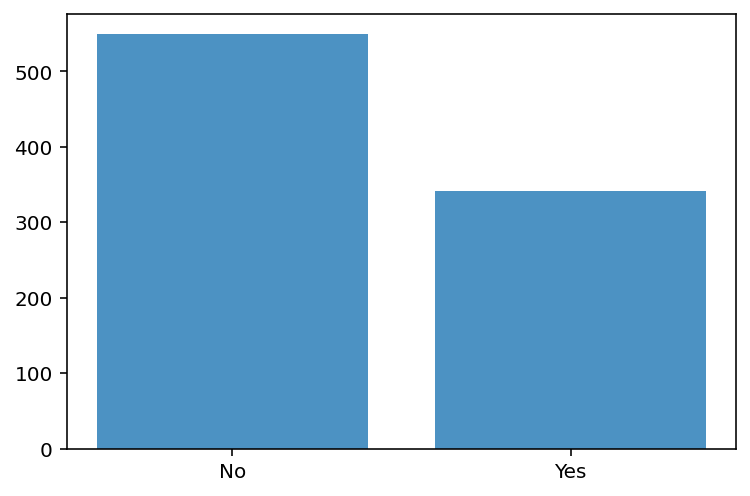

In [42]:
# Bar plot for Categorical varibales

plt.bar(df.groupby('Survived').size().index, df.groupby('Survived').size(), alpha = 0.8)
plt.show()

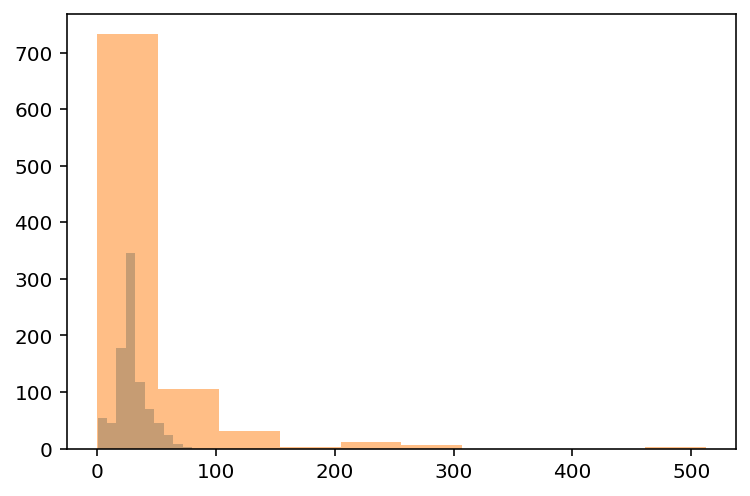

In [50]:
# Overlapped Histogram plots
plt.hist(df['Age'], alpha = 0.5)
plt.hist(df['Fare'], alpha = 0.5)
plt.show()

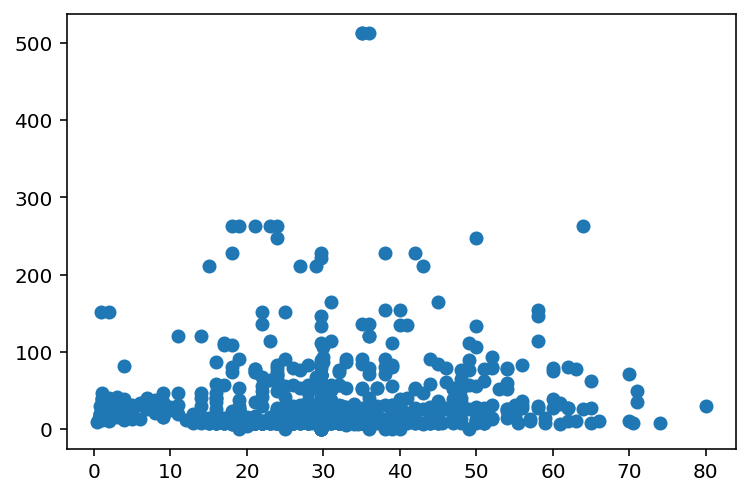

In [52]:
# Scatter Plot to check correlation between two continuous variable

plt.scatter(df['Age'], df['Fare'])
plt.show()

In [57]:
#df.corr()

#### Subplots

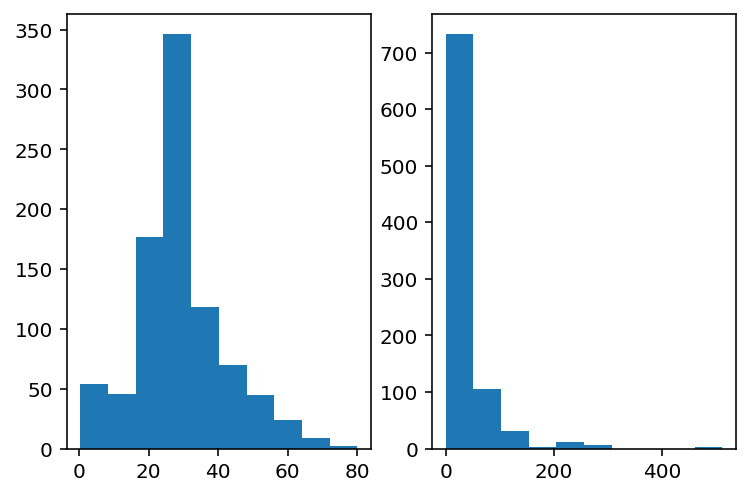

In [58]:
plt.subplot(121)
#plt.subplot(1,2,1)
plt.hist(df['Age'])

plt.subplot(122)
#plt.subplot(1,2,2)
plt.hist(df['Fare'])
plt.show()

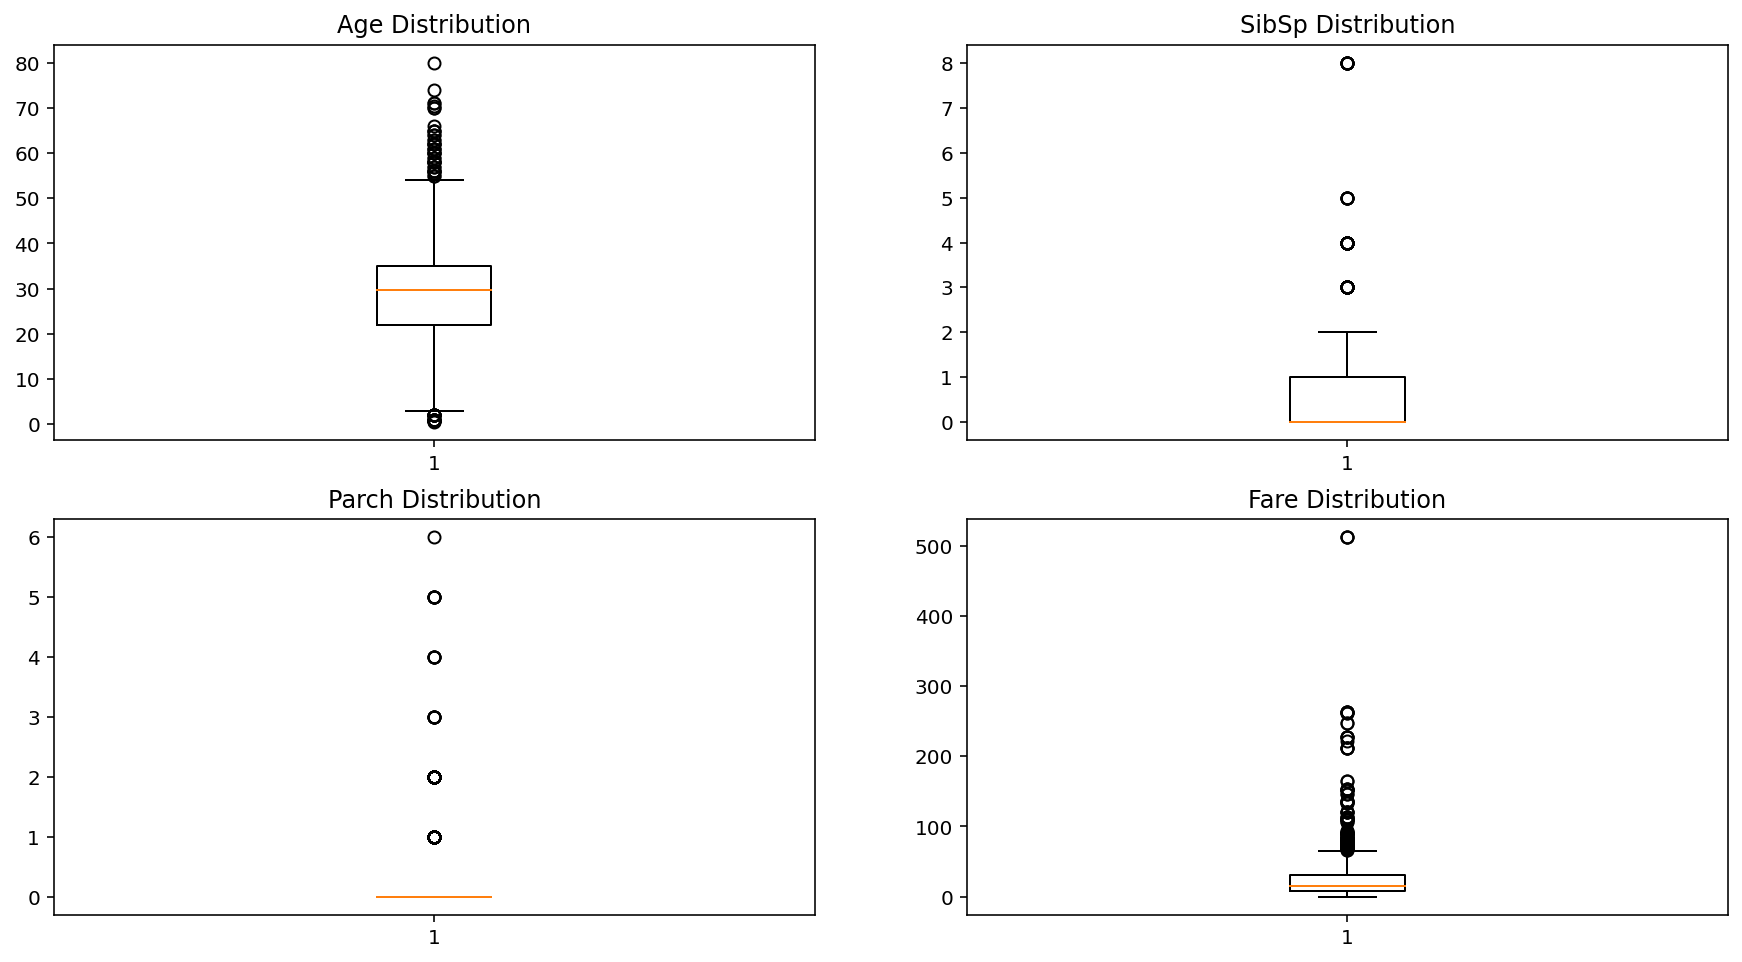

In [66]:
features = ['Age','SibSp','Parch','Fare']

plt.figure(figsize = (15,8))

for number,col in enumerate(features):
    location = '22'+str(number+1)
    plt.subplot(location)
    plt.boxplot(df[col])
    plt.title(col+" Distribution")

plt.show()

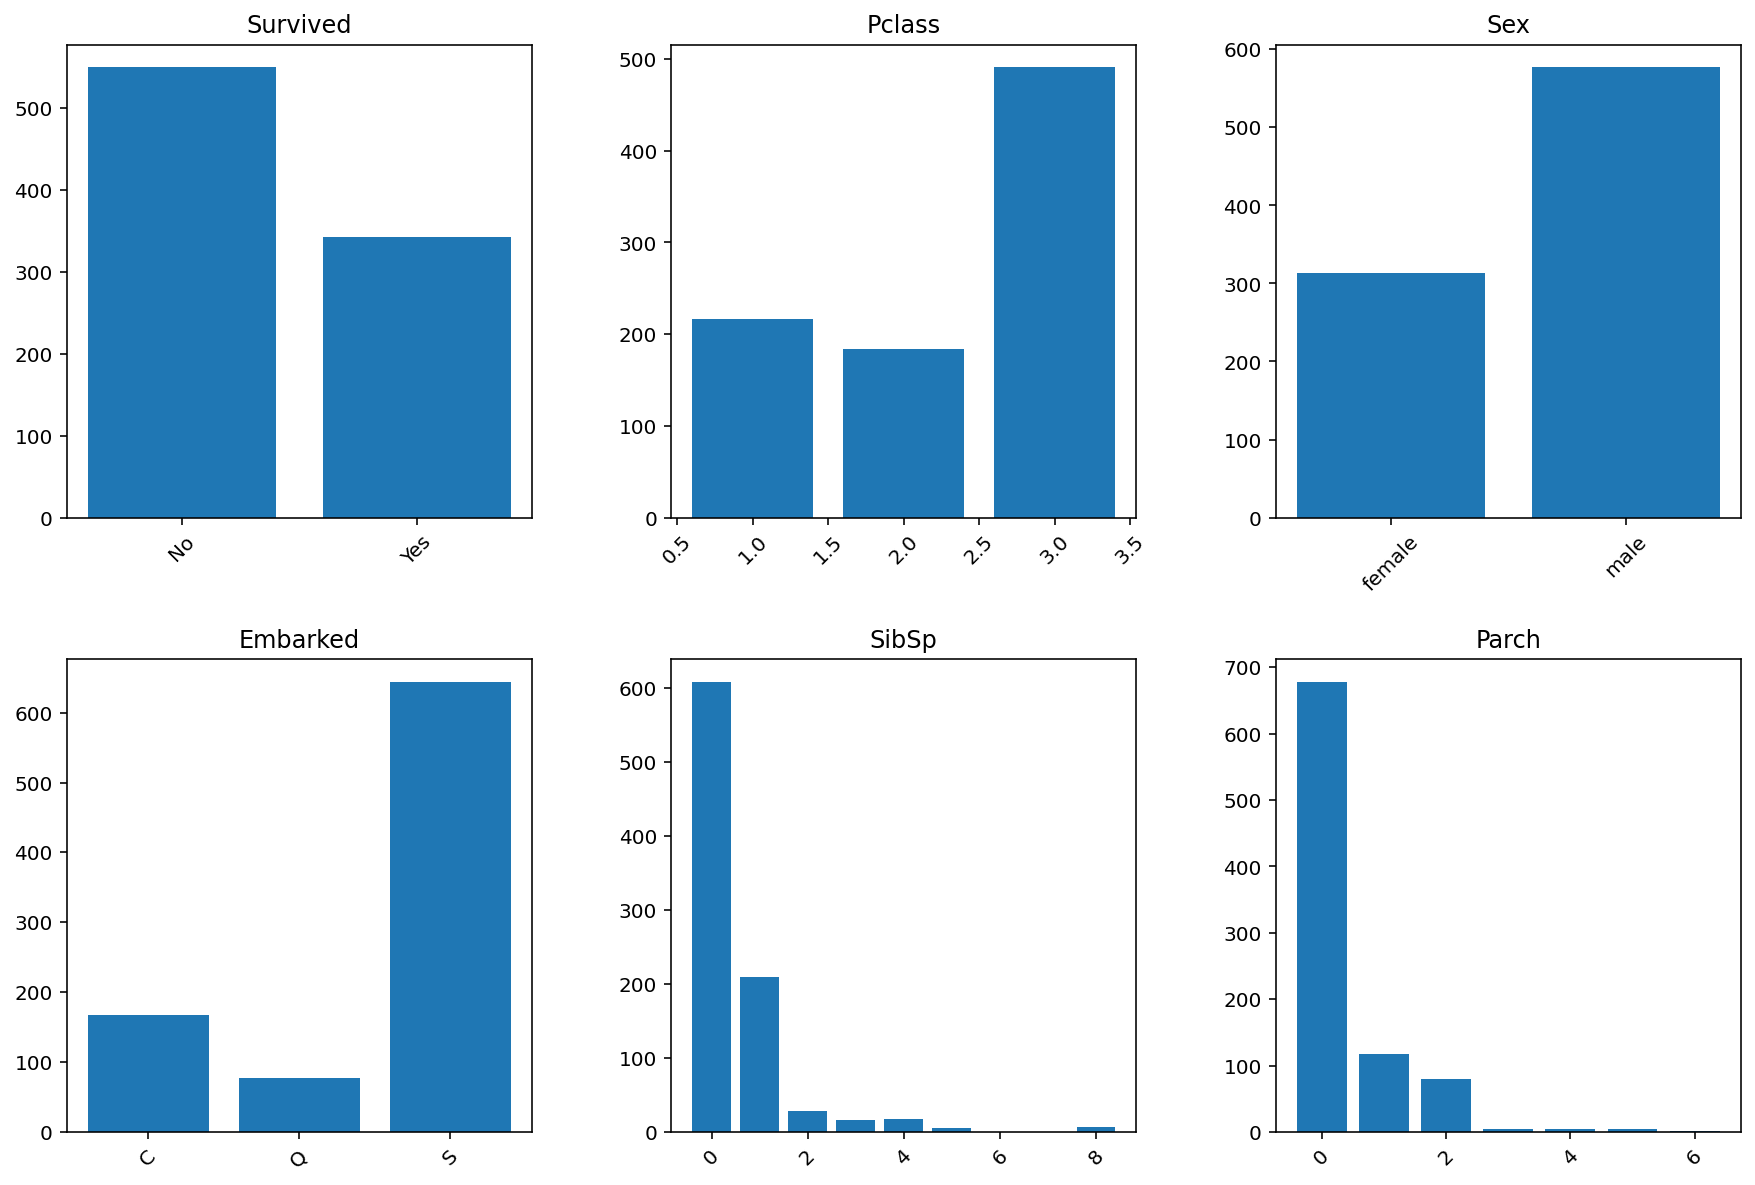

In [77]:
features = ['Survived','Pclass','Sex', 'Embarked', 'SibSp','Parch']

plt.figure(figsize = (15,10))

for number,col in enumerate(features):
    location = '23'+str(number+1)
    plt.subplot(location)
    plt.bar(df.groupby(col).size().index, df.groupby(col).size())
    plt.title(col)
    plt.xticks(rotation = 45)
    
plt.subplots_adjust(hspace=.3, wspace = 0.3)
plt.show()

### Visualization using Pandas

Pandas has a built in .plot() function as part of the DataFrame class. It has several key parameters:<br>

**kind** — 'line','box','bar',’barh’,’pie’,’scatter’,’kde’ etc which can be found in the docs.<br>
**color** — Which accepts and array of hex codes corresponding sequential to each data series / column.<br>
**linestyle** — ‘solid’, ‘dotted’, ‘dashed’ (applies to line graphs only)<br>
**xlim, ylim** — specify a tuple (lower limit, upper limit) for which the plot will be drawn<br>
**legend** — a boolean value to display or hide the legend<br>
**subplots** —  a boolean vlaue, default False. Make separate subplots for each column<br>
**title** — The string title of the plot<br>

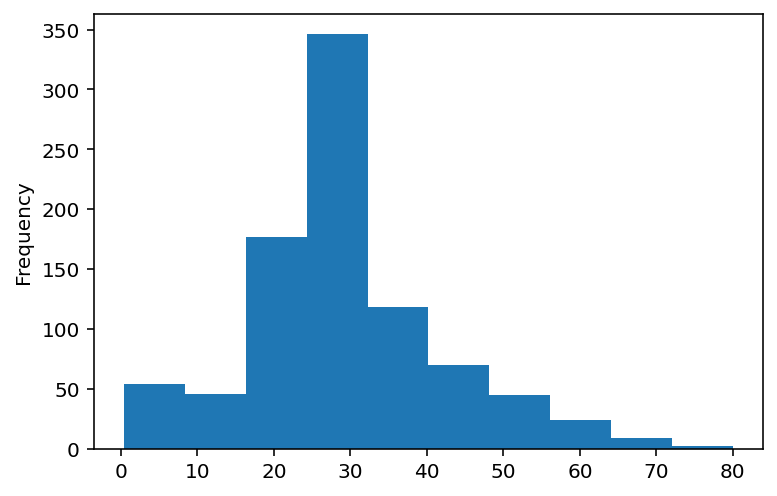

In [78]:
df['Age'].plot(kind = 'hist')
#df['Age'].plot.hist()
plt.show()

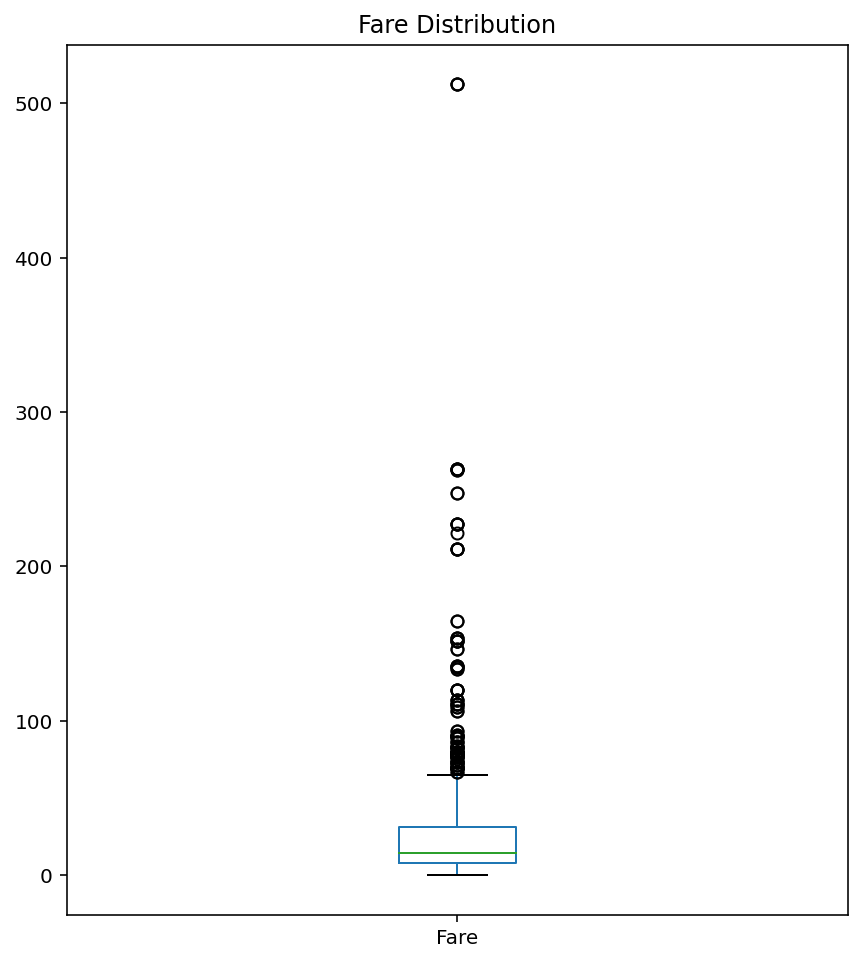

In [79]:
df['Fare'].plot(kind = 'box', title = 'Boxplot', figsize = (7,8))
plt.title("Fare Distribution")
plt.show()

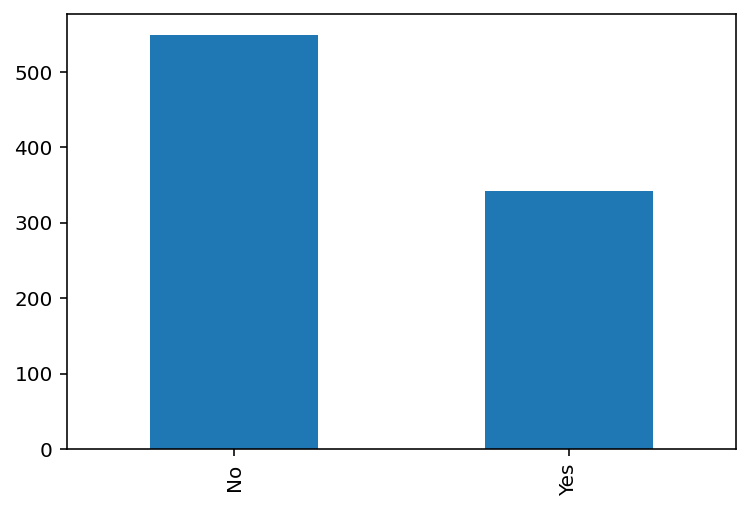

In [80]:
df['Survived'].value_counts().plot.bar()
plt.show()

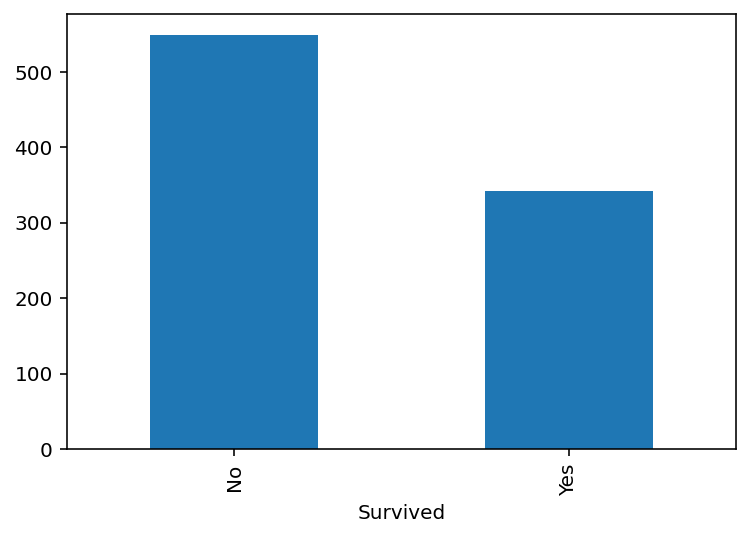

In [81]:
df.groupby('Survived').size().plot(kind = 'bar')
plt.show()

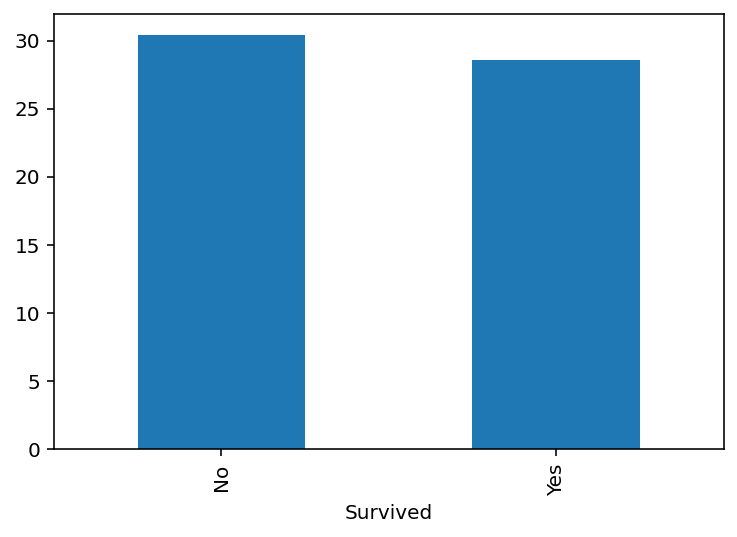

In [82]:
df.groupby('Survived')['Age'].mean().plot(kind = 'bar')

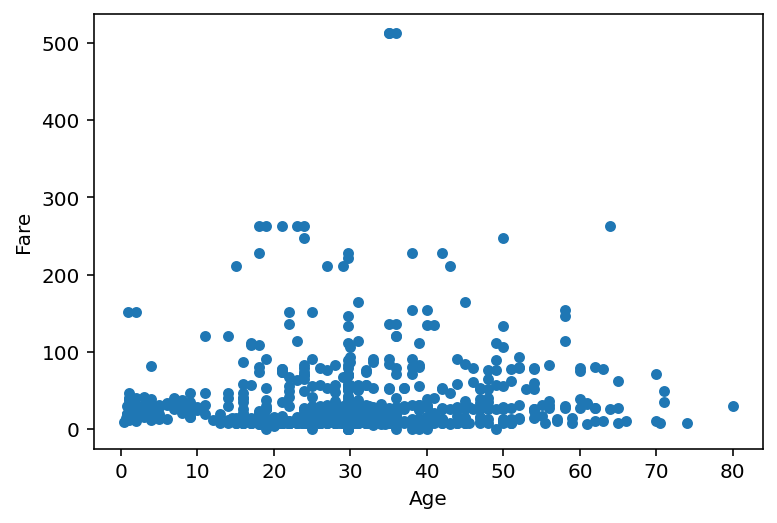

In [83]:
df.plot(x = 'Age', y = 'Fare' , kind = 'scatter')
plt.show()

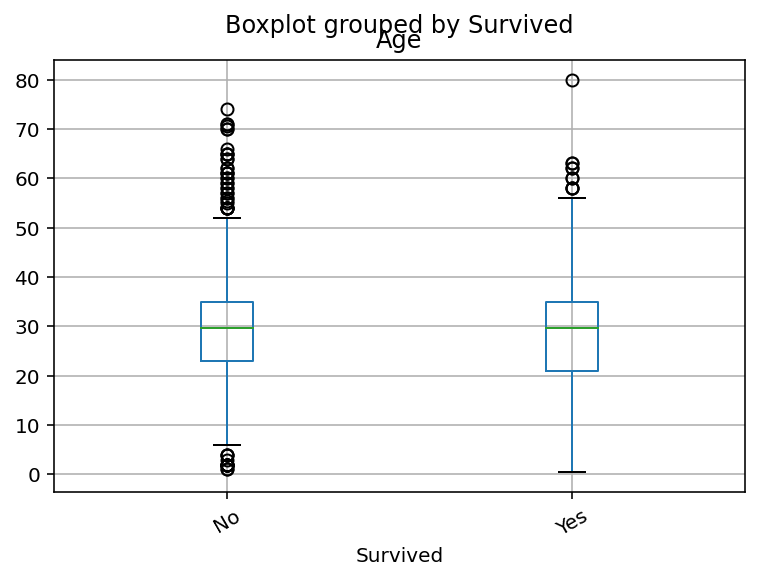

In [84]:
df.boxplot('Age', by = 'Survived', rot = 30)
plt.show()

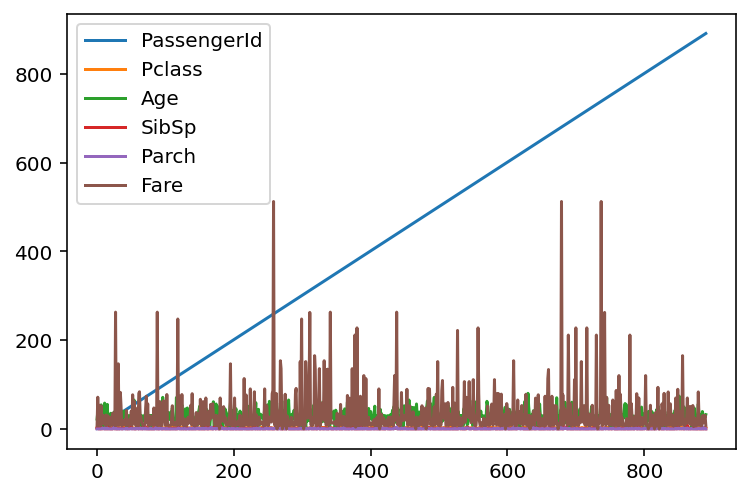

In [85]:
df.plot()
plt.show()

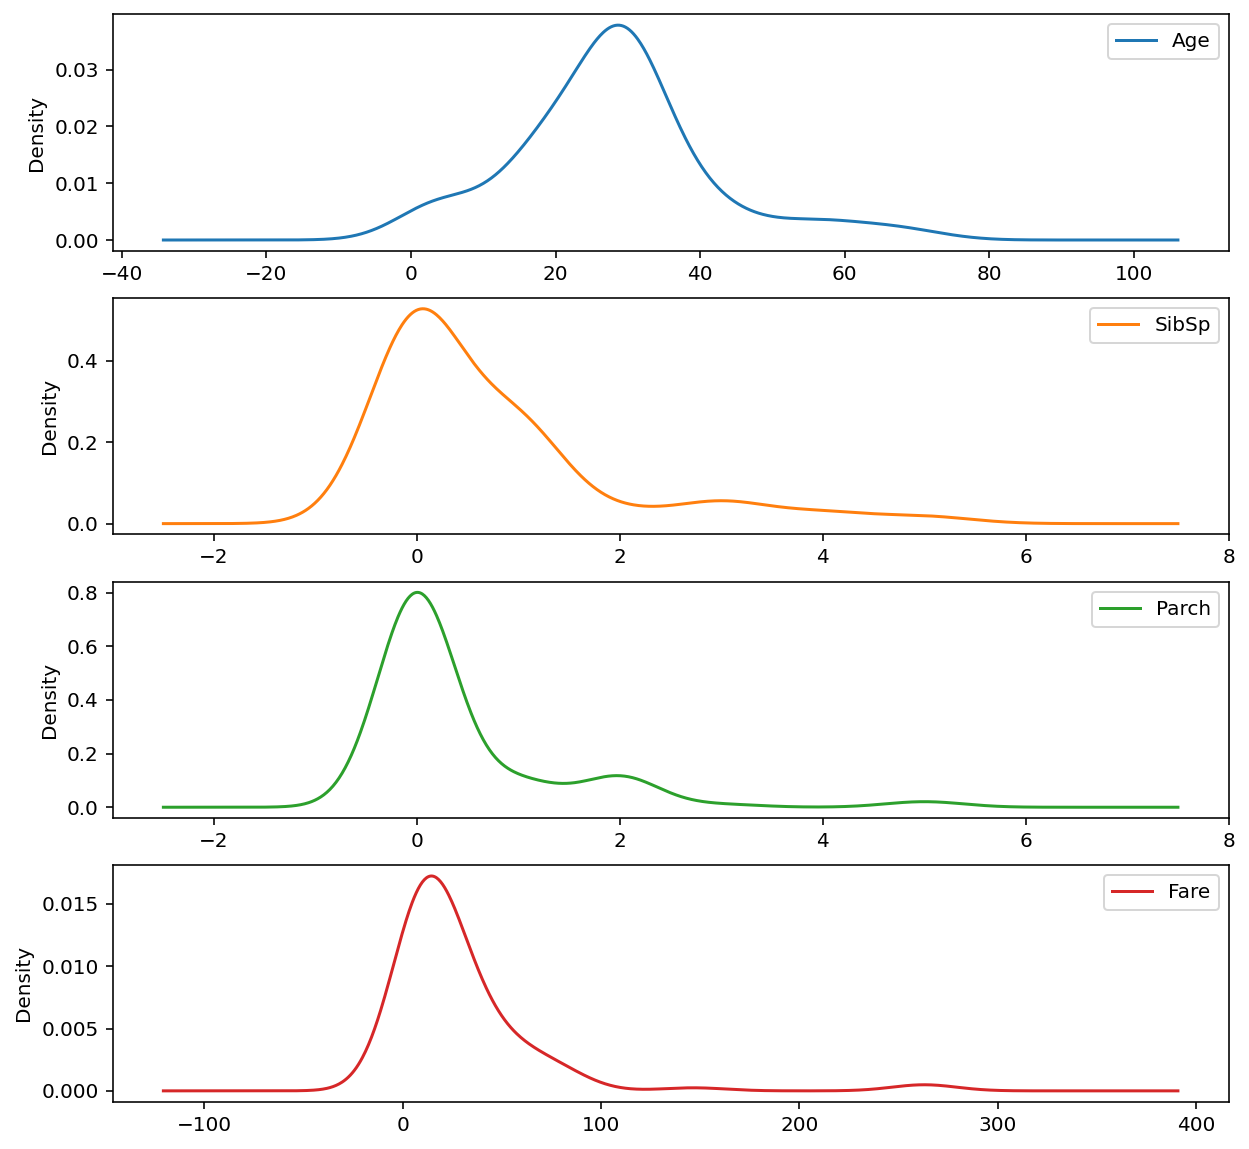

In [86]:
features = ['Age','SibSp','Parch','Fare']
df[features].plot(kind='density', subplots=True, sharex=False, figsize = (10,10))
plt.show()

### Visualization using Seaborn

Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.

#### Keys Features
* Seaborn is a statistical plotting library
* It has beautiful default styles
* It also is designed to work very well with Pandas dataframe objects.

To install the latest release of seaborn, you can use pip/conda:<br>

!pip install seaborn==0.9.0<br>
!conda install seaborn==0.9.0

**Make sure to use version greater than 0.9.0. Use below command to update to latest version**<br>

!pip install -U seaborn --user 

In [87]:
import seaborn as sns
sns.set() #Set aesthetic parameters in one step. Here we applied the default default seaborn theme, scaling, and color palette

In [88]:
print(sns.__version__)

0.9.0


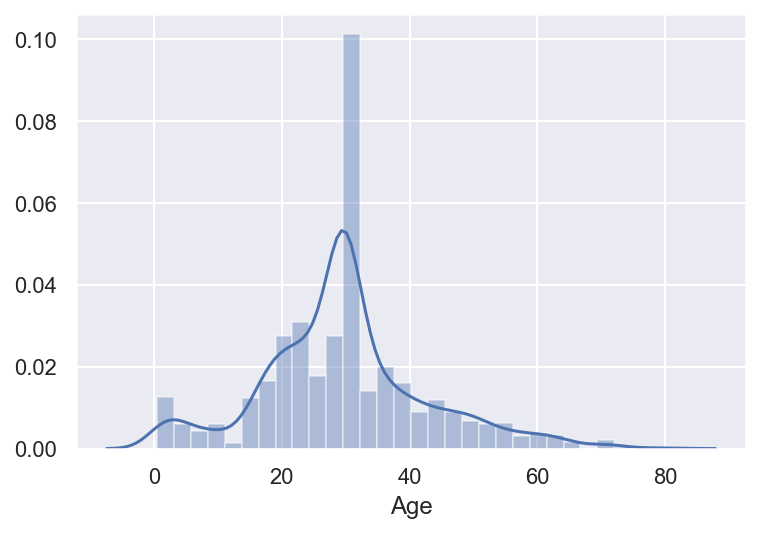

In [89]:
sns.distplot(df['Age'])#, kde=False)
#sns.kdeplot(df['Age'], shade=True)

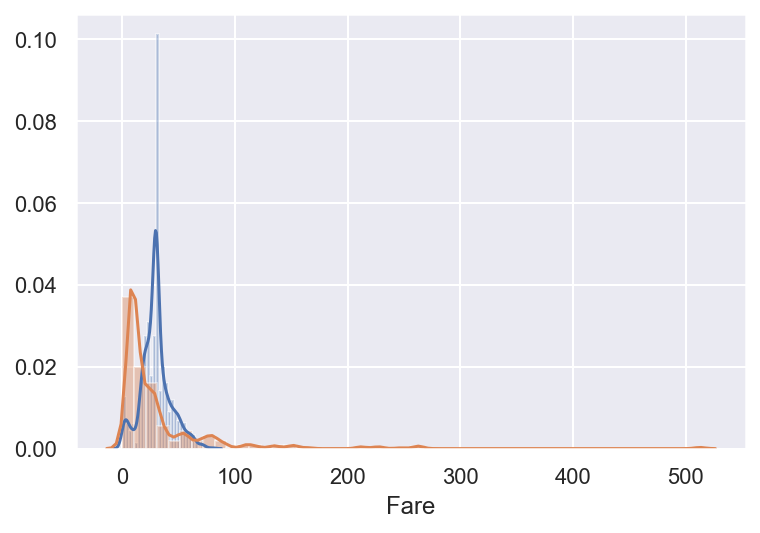

In [90]:
#plt.figure(figsize = (10,10))
sns.distplot(df['Age'])
sns.distplot(df['Fare'])

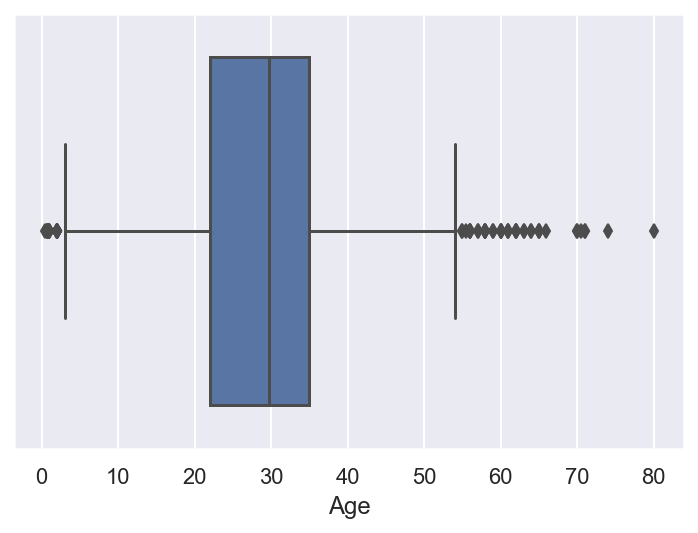

In [91]:
sns.boxplot(df['Age'])

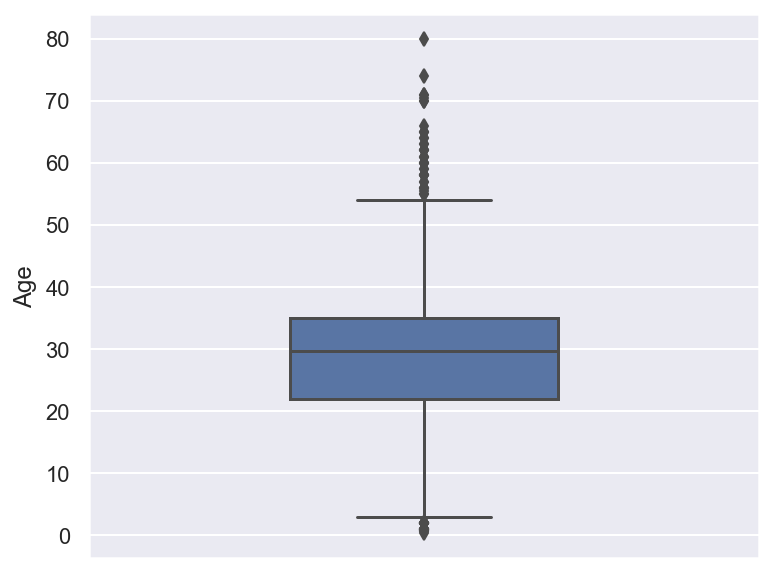

In [92]:
plt.figure(figsize = (6,5))
sns.boxplot(df['Age'], orient="v", width = 0.4)

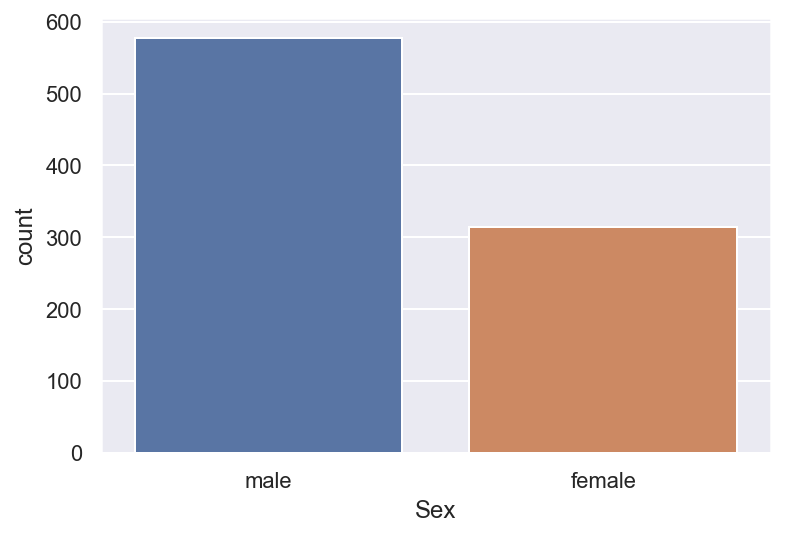

In [96]:
# How to plot unique values of categorical variable

sns.countplot('Sex', data = df)
#sns.countplot(df['Sex'])

In [95]:
df.head(3)

PassengerId Survived  Pclass  \
0            1       No       3   
1            2      Yes       1   
2            3      Yes       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S

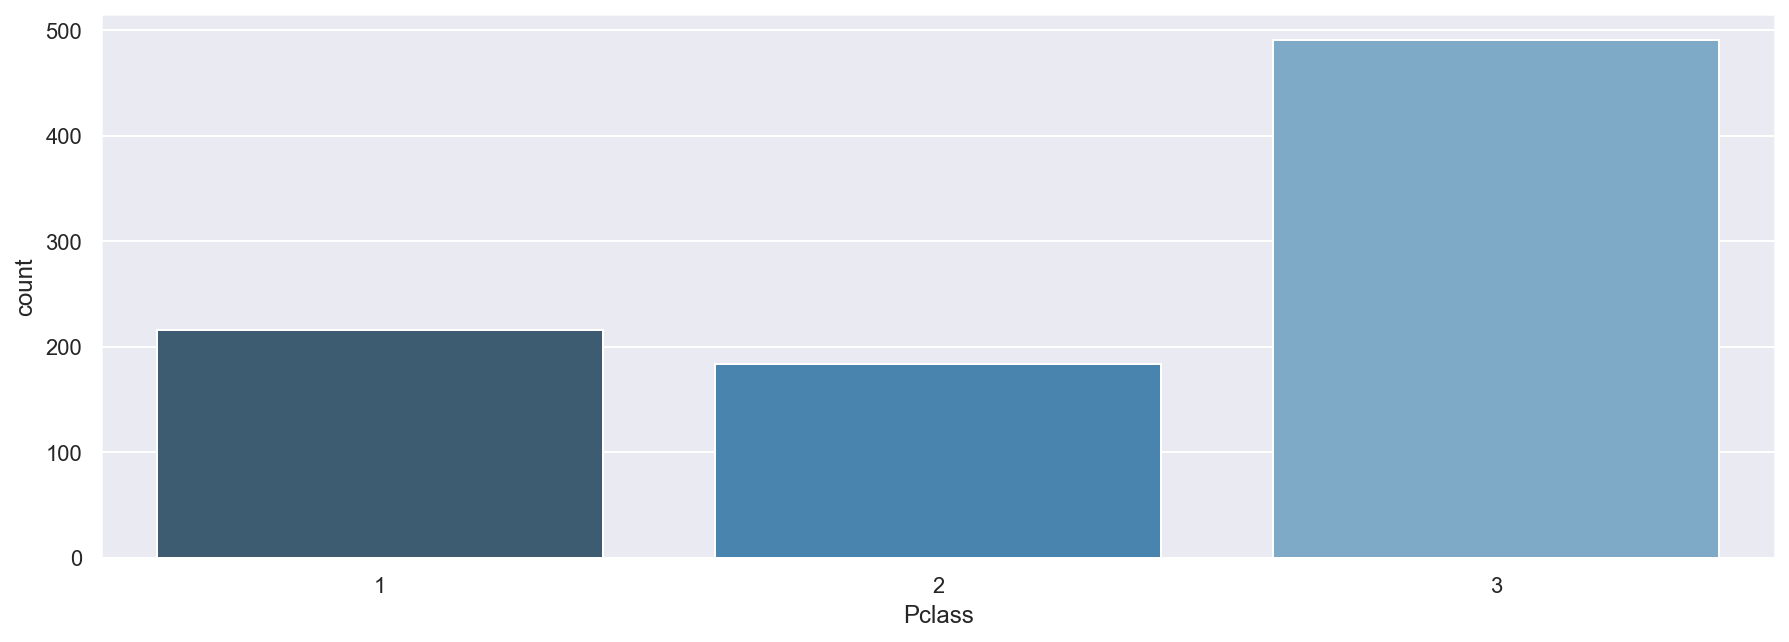

In [101]:
plt.figure(figsize = (15,5))
plt.xticks(rotation = 0)
sns.countplot('Pclass', data = df, palette = 'Blues_d')
#sns.countplot('Pclass', data = df,palette = 'Blues_d', order = df['Pclass'].value_counts().index)

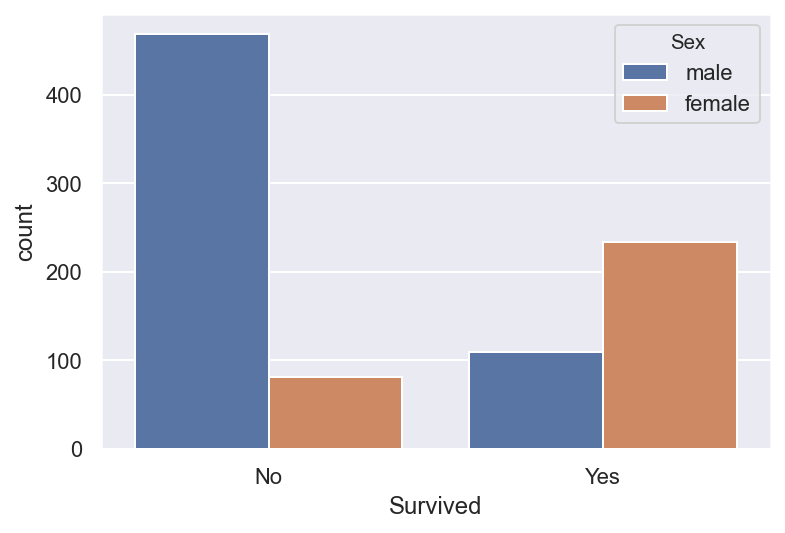

In [104]:
# Visualizing the relationship between two categorical variables

sns.countplot(x='Survived', data = df, hue = 'Sex')

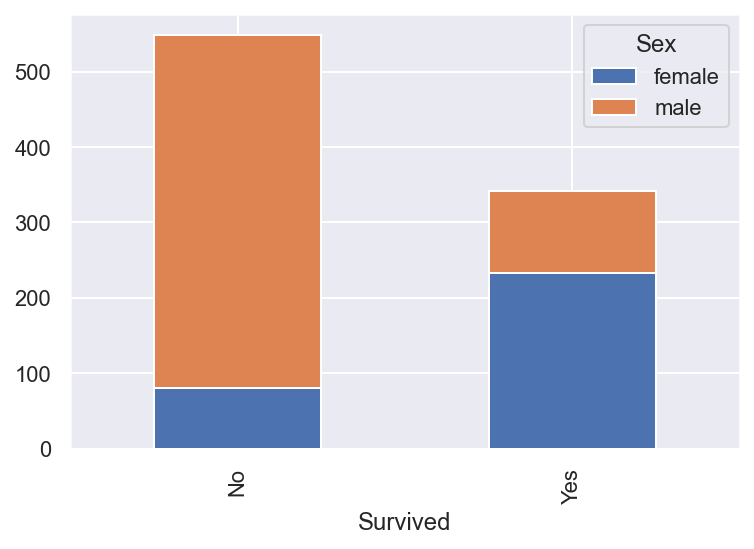

In [106]:
pd.crosstab(df['Survived'],df['Sex']).plot(kind = 'bar', stacked = True)
#pd.crosstab(df['Survived'],df['Sex'], normalize = True).plot(kind = 'bar', stacked = True)

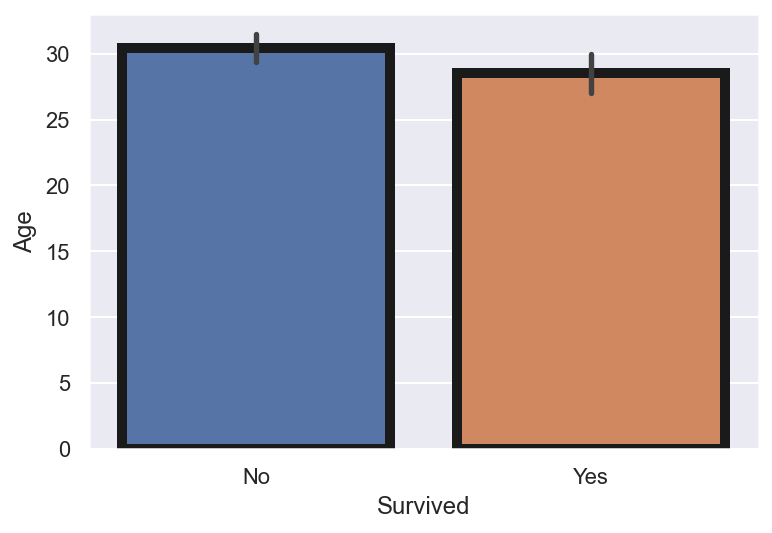

In [107]:
sns.barplot('Survived','Age', data = df, linewidth=5, edgecolor = 'k', saturation = 0.8)

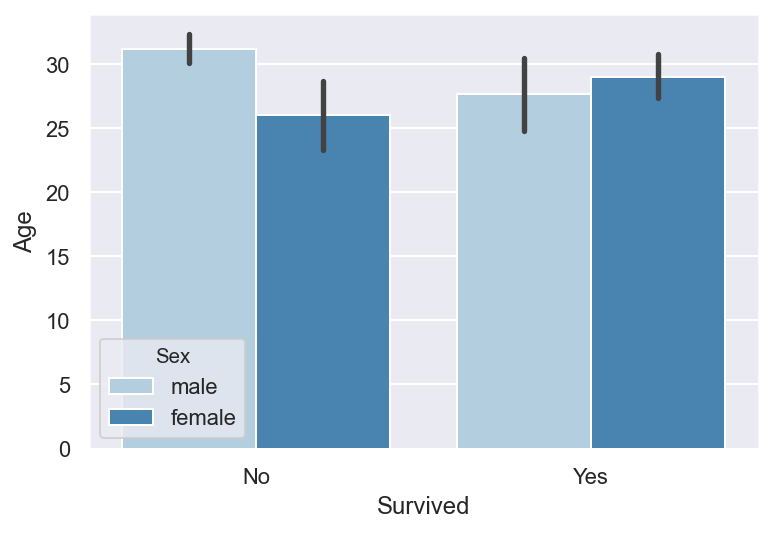

In [109]:
sns.barplot('Survived','Age', data = df, hue = 'Sex', palette = 'Blues')

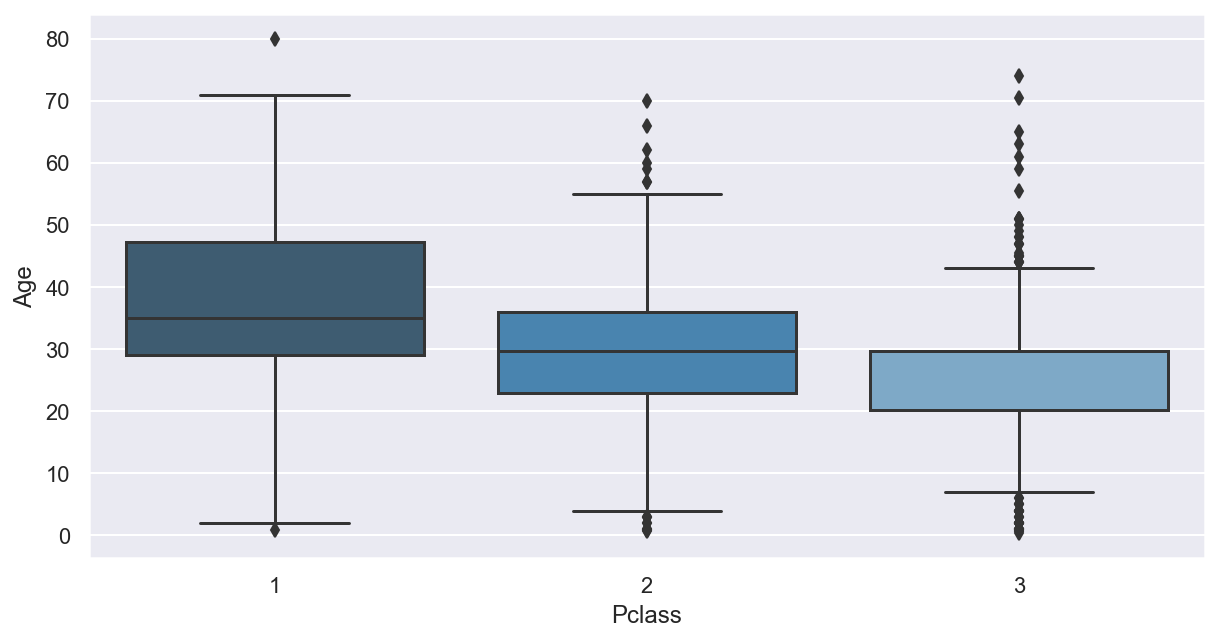

In [112]:
plt.figure(figsize = (10,5))
sns.boxplot('Pclass', 'Age', data = df)
#sns.boxplot('Pclass', 'Age', data = df, palette = 'Blues_d')

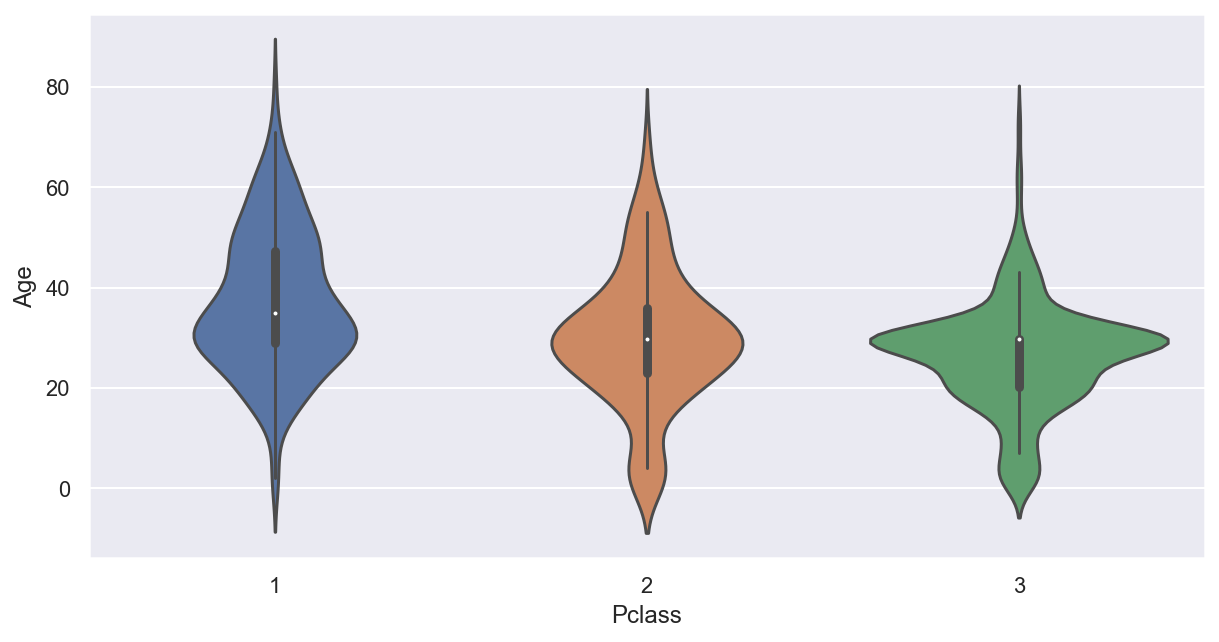

In [115]:
plt.figure(figsize = (10,5))
sns.violinplot('Pclass', 'Age', data = df)
#sns.boxplot('workclass', 'Age', data = df, palette = 'Blues_d')

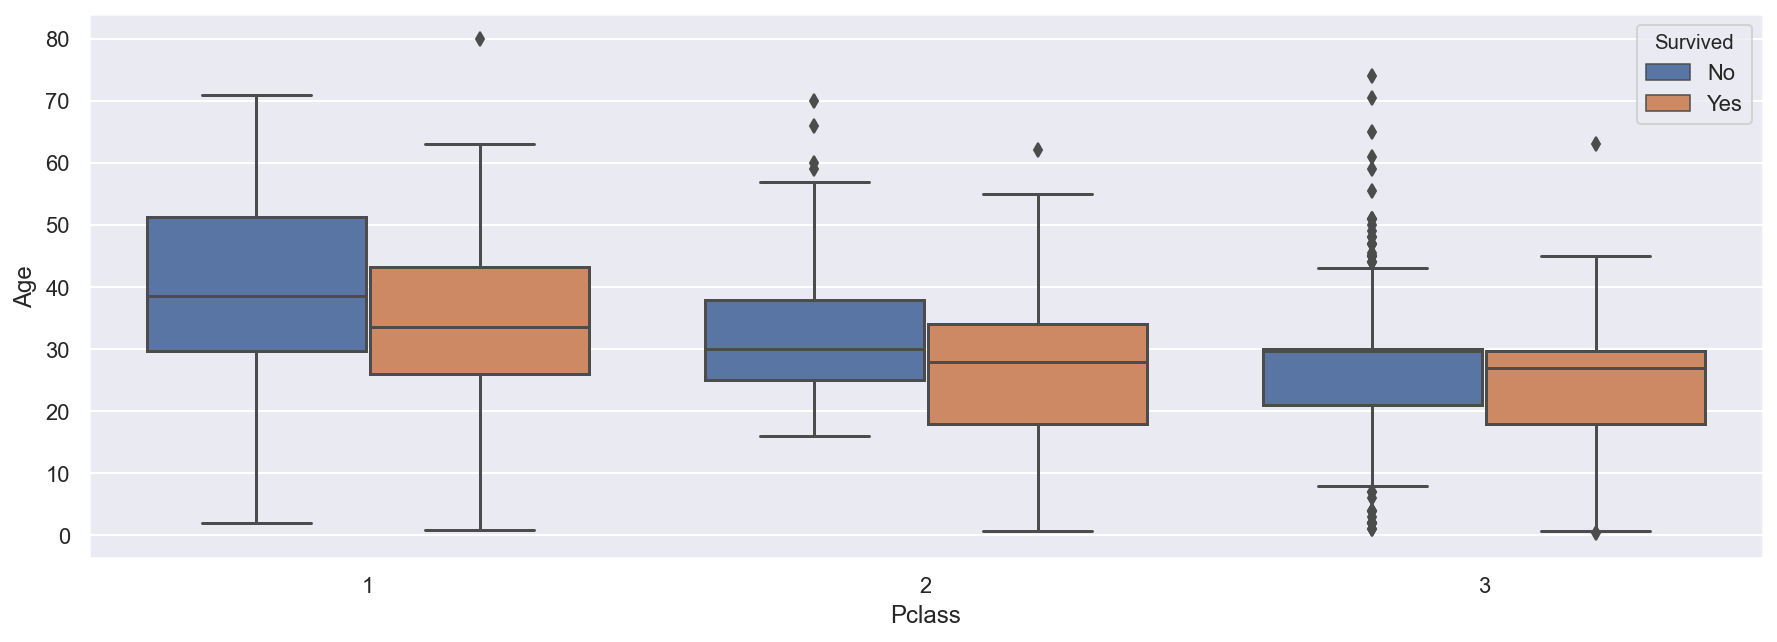

In [118]:
plt.figure(figsize = (15,5))
sns.boxplot('Pclass', 'Age', data = df, hue = 'Survived')
#sns.boxplot('Pclass', 'Age', data = df, hue = 'Survived', palette = 'Blues_d')

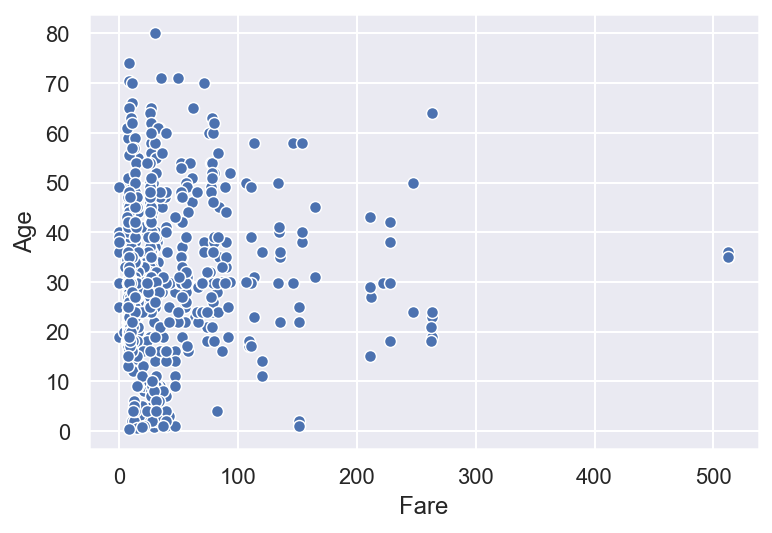

In [123]:
sns.scatterplot('Fare','Age', data = df)
#sns.scatterplot('Fare','Age', data = df, hue = 'Survived')

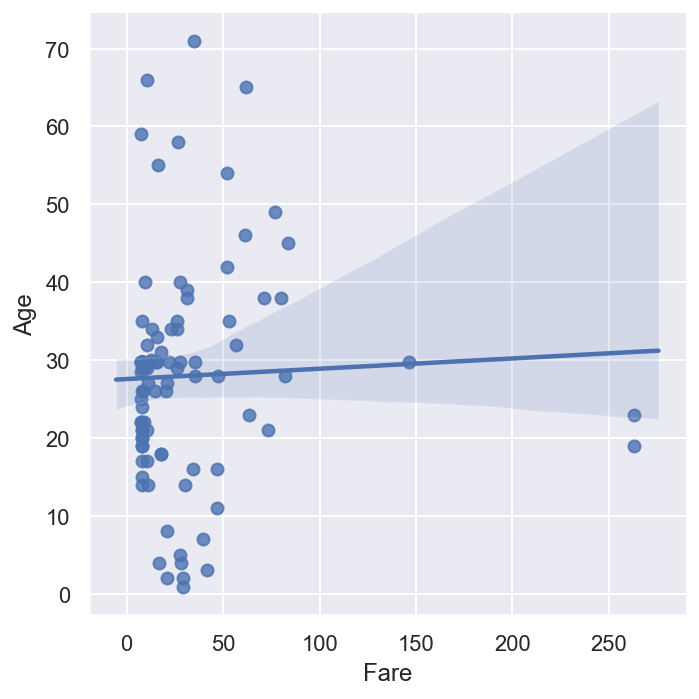

In [125]:
sns.lmplot('Fare','Age', data = df.head(100))
#sns.lmplot('Fare','Age', data = df.head(100), hue = 'Survived')

#### Facetgrid

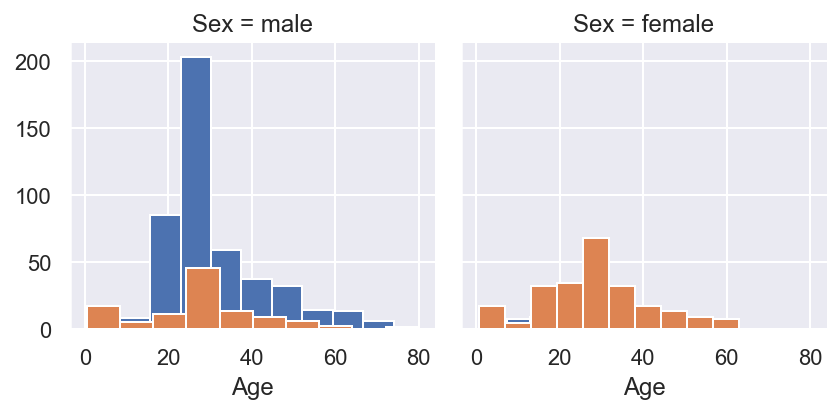

In [126]:
g = sns.FacetGrid(data = df, col = 'Sex', hue = 'Survived')
g.map(plt.hist,'Age')
#g.map(sns.distplot,'Age')

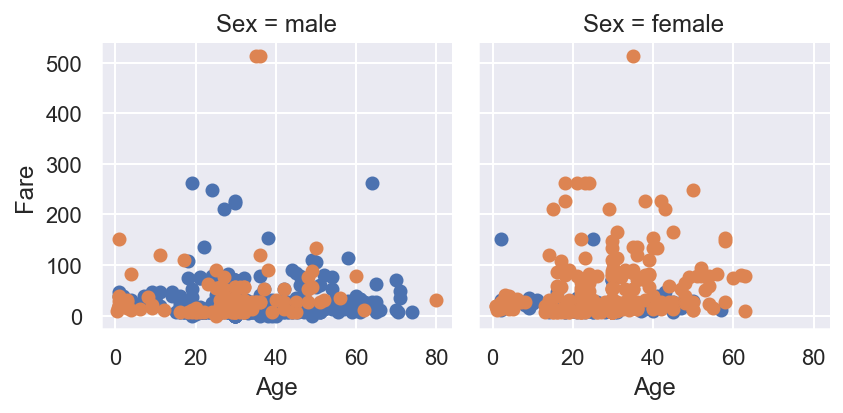

In [127]:
g = sns.FacetGrid(data = df, col = 'Sex', hue = 'Survived')
g.map(plt.scatter,'Age','Fare')

#### Subplots

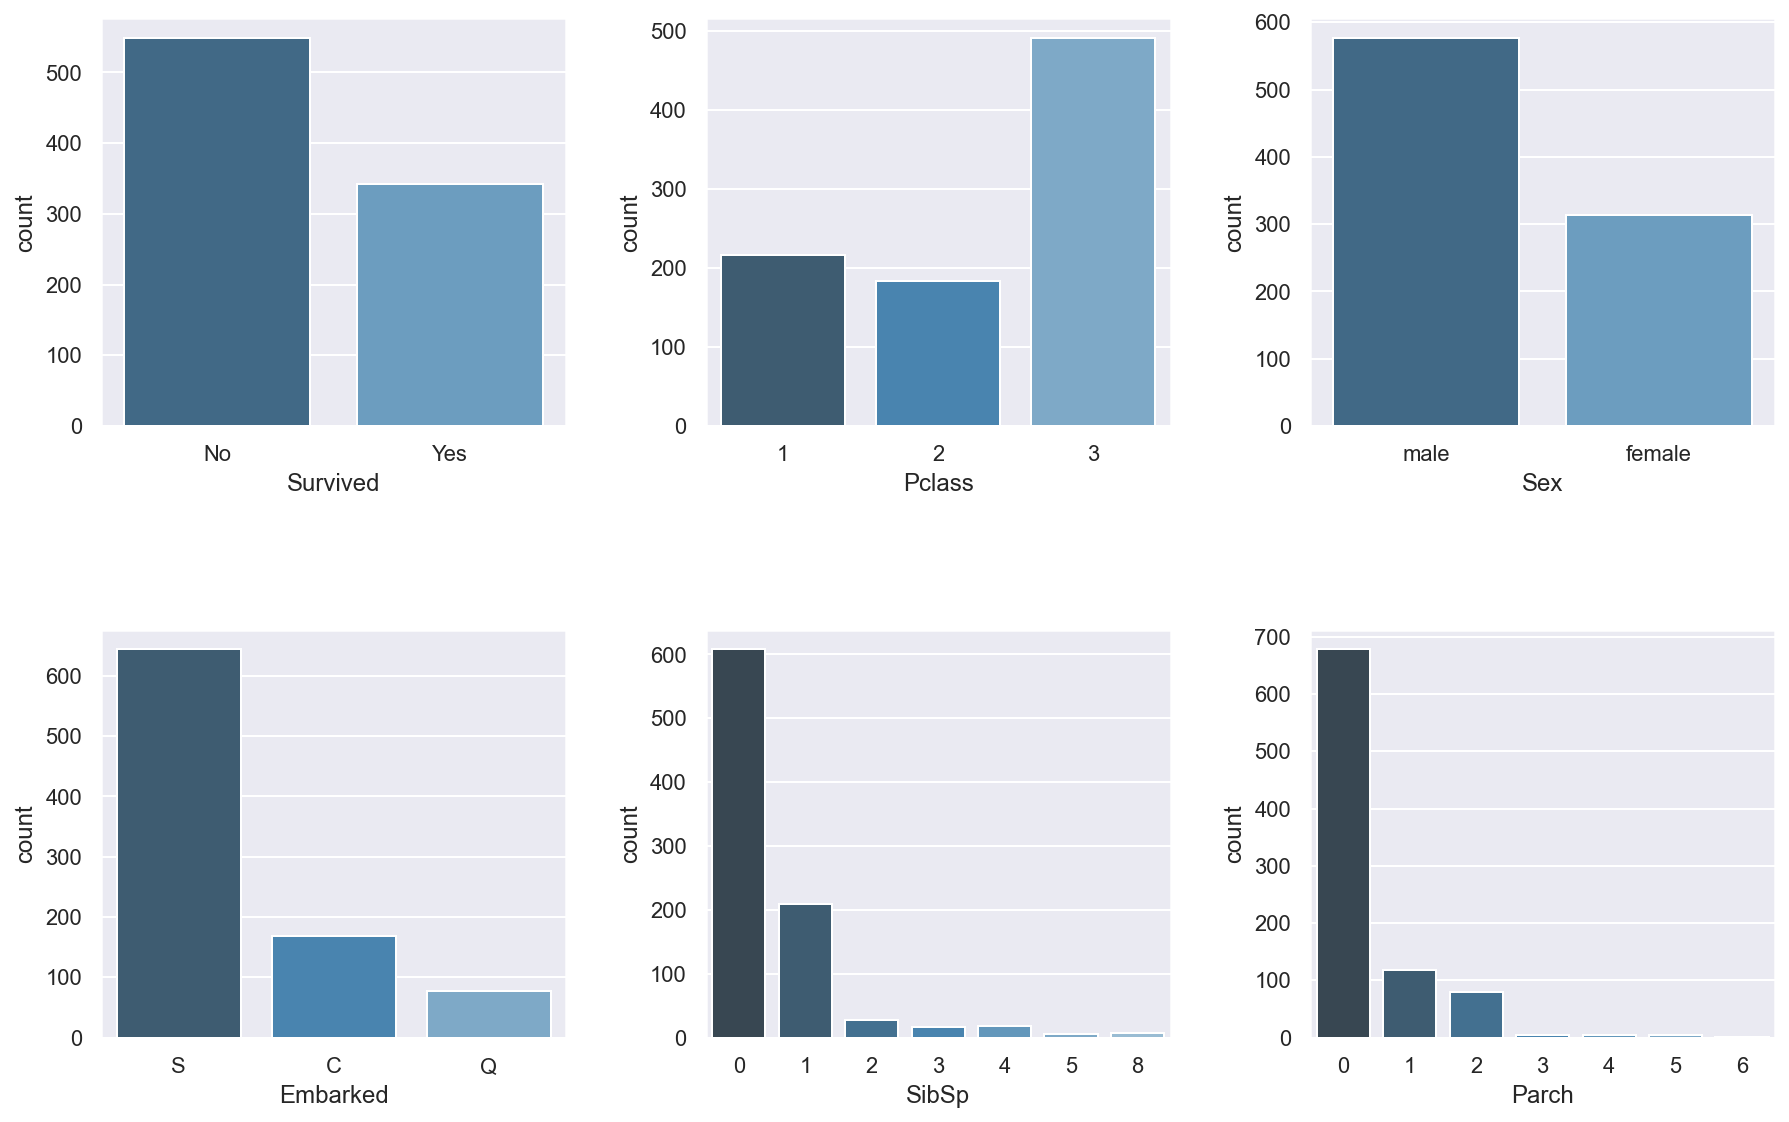

In [129]:
features = ['Survived','Pclass','Sex', 'Embarked', 'SibSp','Parch']

plt.figure(figsize = (15,15))

for number,col in enumerate(features):
    location = '33'+str(number+1)
    plt.subplot(location)
    sns.countplot(col, data = df, palette = 'Blues_d')
    #plt.xticks(rotation = 45)

plt.subplots_adjust(hspace=.5, wspace = 0.3)
plt.show()

#### Pairplot

In [133]:
df.set_index('PassengerId', inplace = True)

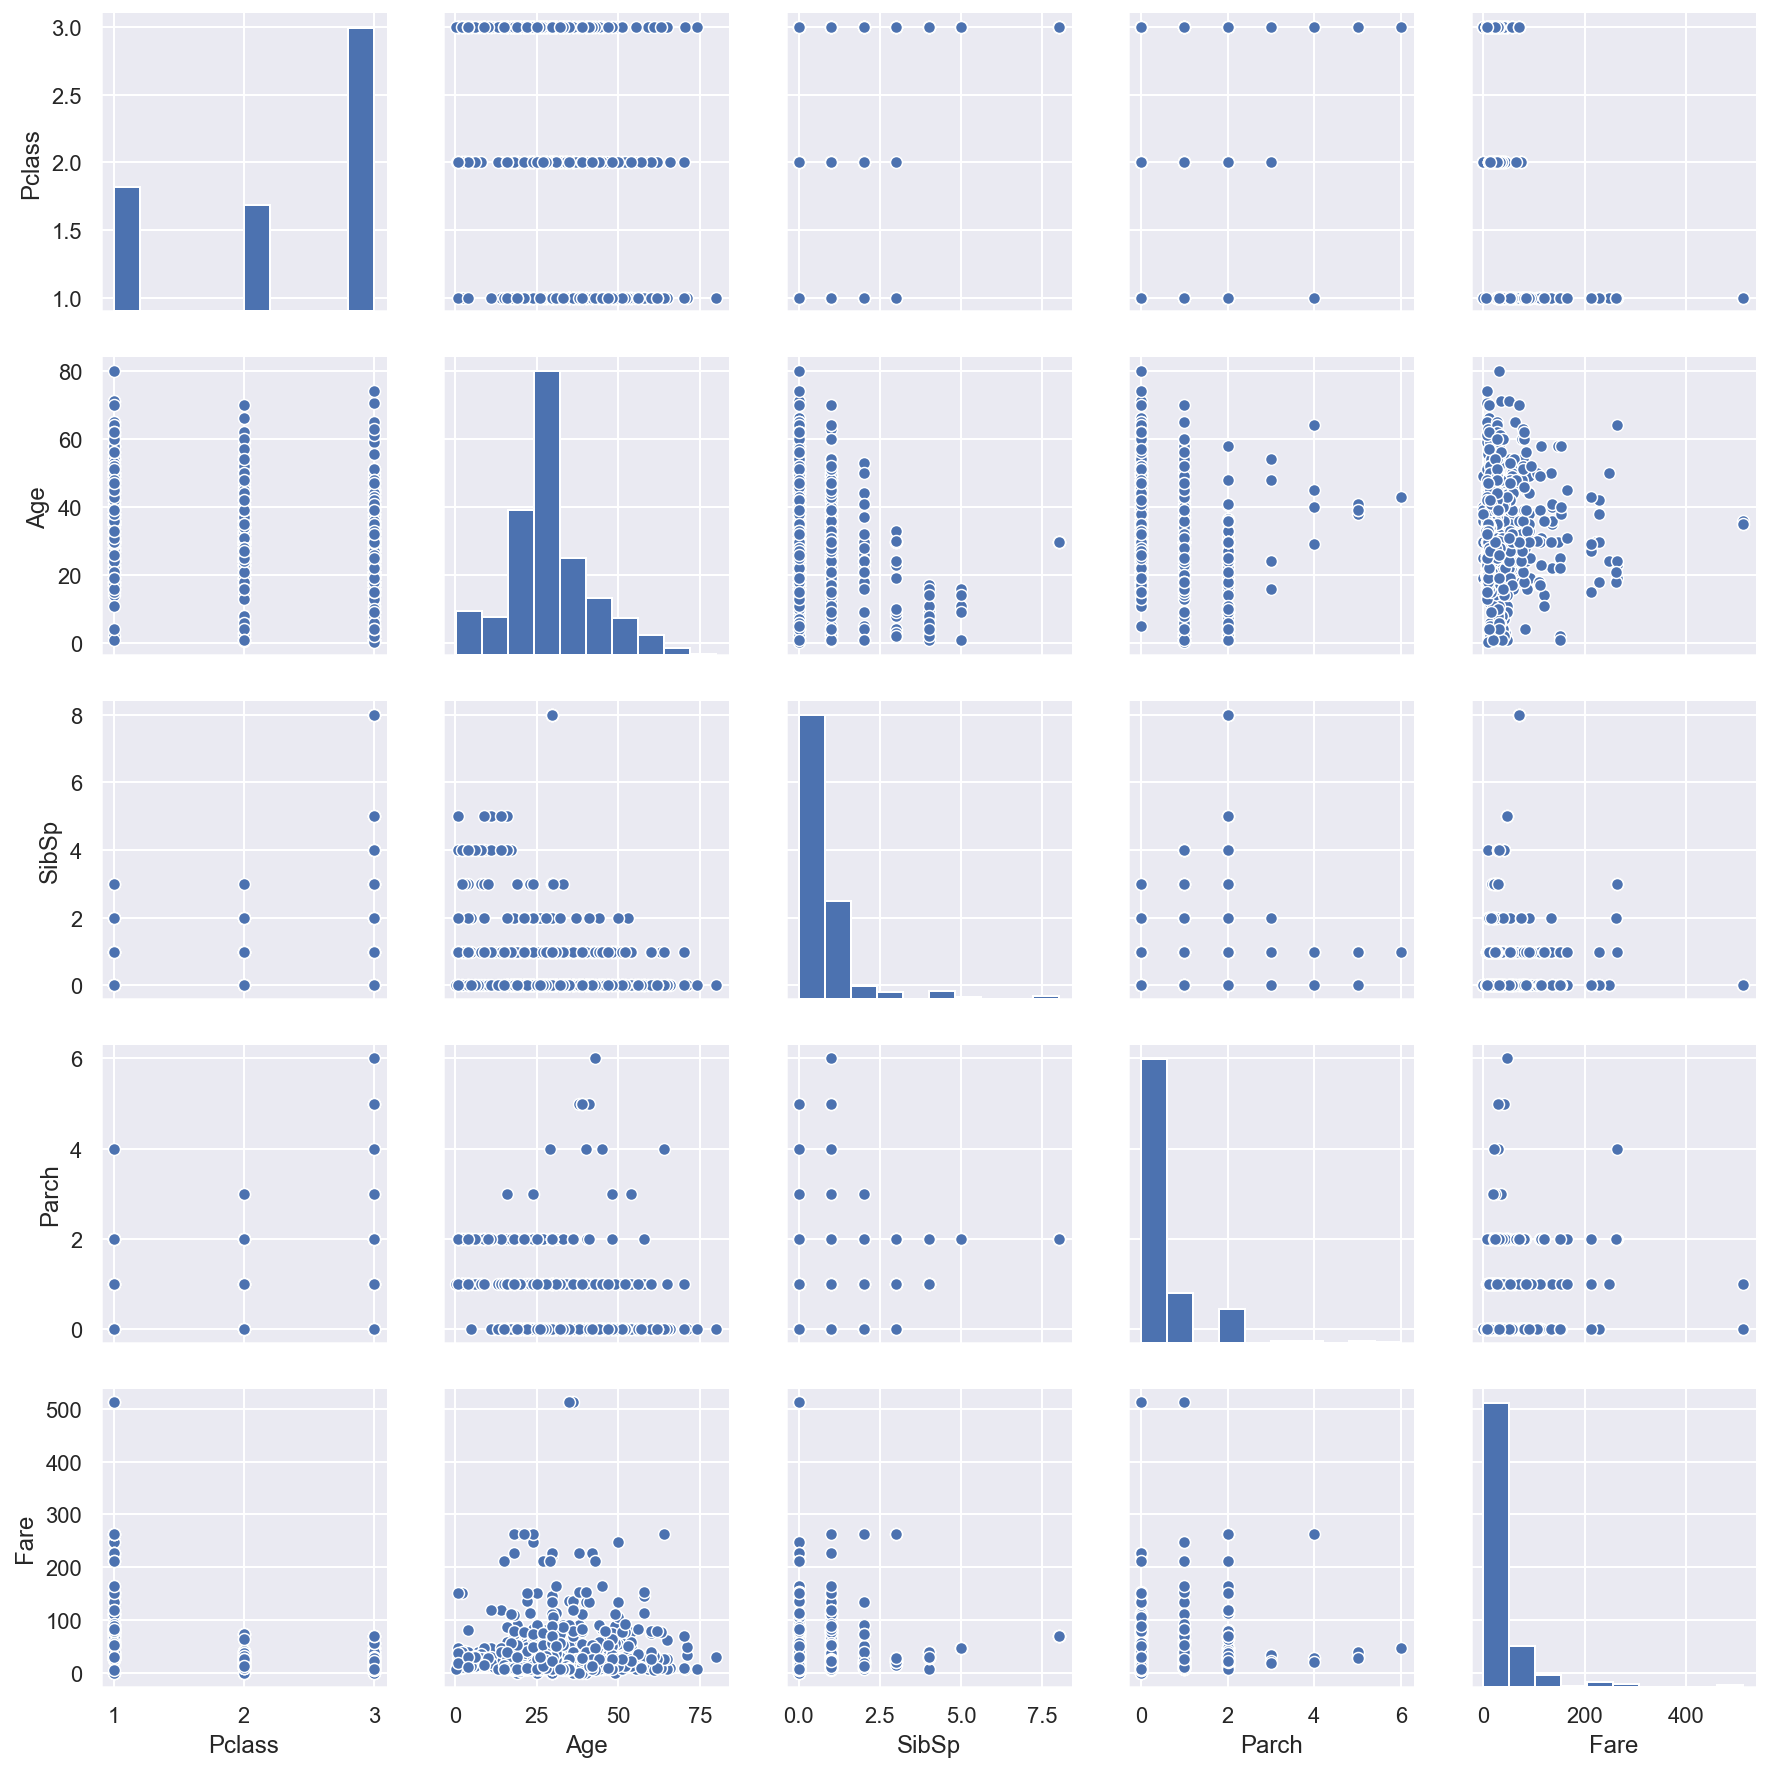

In [144]:
sns.pairplot(df)

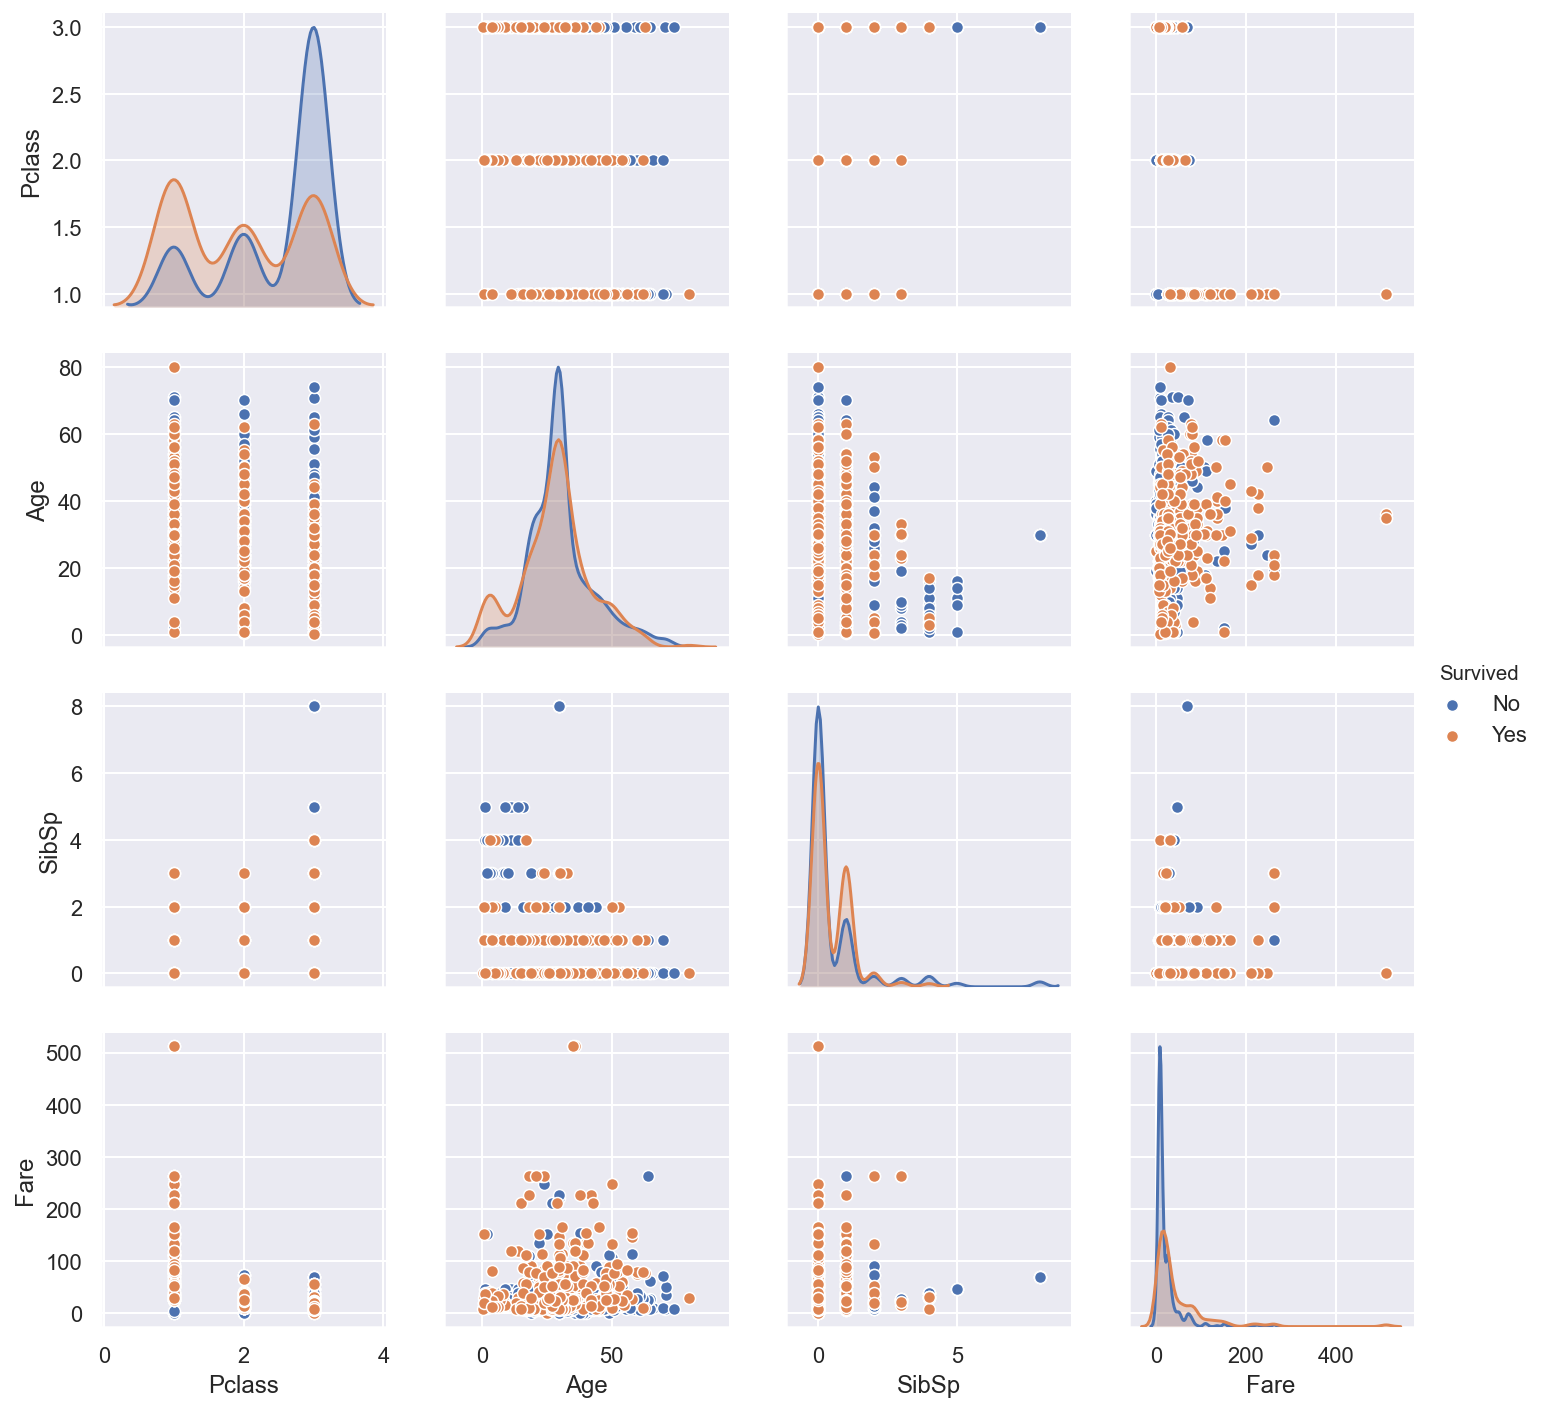

In [153]:
features = ['Pclass','Age','SibSp','Fare','Survived']
sns.pairplot(df[features], hue = 'Survived')

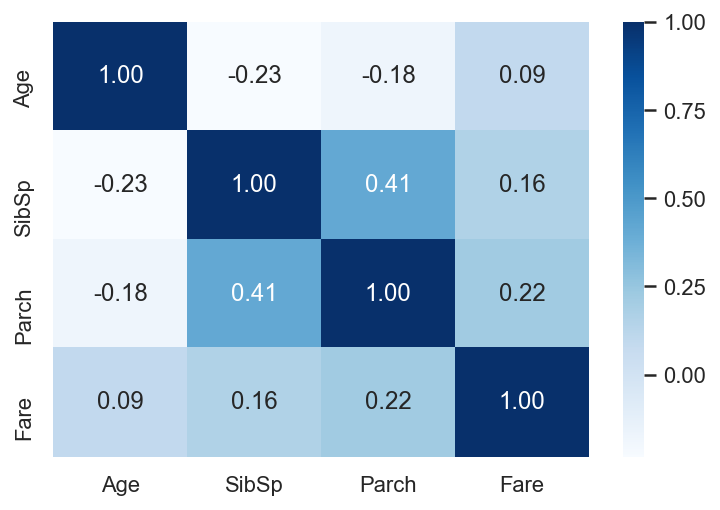

In [152]:
sns.heatmap(df.corr(), cmap = 'Blues', annot = True, fmt = '.2f')

### Pandas profiling 

Generates profile reports from a pandas DataFrame. The pandas df.describe() function is great but a little basic for serious exploratory data analysis. pandas_profiling extends the pandas DataFrame with df.profile_report() for quick data analysis.

For each column the following statistics - if relevant for the column type - are presented in an interactive HTML report:

* **Type inference**: detect the types of columns in a dataframe.
* **Essentials: type**, unique values, missing values
* **Quantile statistics** like minimum value, Q1, median, Q3, maximum, range, interquartile range
* **Descriptive statistics** like mean, mode, standard deviation, sum, median absolute deviation, coefficient of variation, kurtosis, skewness
* **Most frequent values**
* **Histogram**
* **Correlations** highlighting of highly correlated variables, Spearman, Pearson and Kendall matrices
* **Missing values** matrix, count, heatmap and dendrogram of missing values
* **Text analysis** learn about categories (Uppercase, Space), scripts (Latin, Cyrillic) and blocks (ASCII) of text data.

**Use below command to install the packAge:**<br>
!pip install pandas_profiling --user

**To install the latest version directly from Github:**<br>

!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

In [154]:
from pandas_profiling import ProfileReport

In [159]:
# Loading dataset
df = pd.read_csv('titanic.csv', sep = '|')
df.shape

(891, 12)

In [160]:
profile = ProfileReport(df, title='Pandas Profiling Report', html={'style':{'full_width':True}})

In [161]:
profile

In [9]:
#profile.to_file(output_file="pandas_profiling_report.html")